# MBAN Predictive Modeling Midterm Exam
Stuent Name: Lin Yang

Student number: 221017751

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import GMM

# Read the data
df = pd.read_csv('/Users/allenyang/Downloads/Schulich/MBAN5110/midterm_partone.csv')

# Prepare the data
y_vals = np.array(df["Stock Change"])
x_vals = np.array(df[["Inventory Turnover", "Operating Profit", "Interaction Effect"]])
iv_vals = np.array(df[["Current Ratio", "Quick Ratio", "Debt Asset Ratio"]])

class ModifiedGMM(GMM):
    def momcond(self, params):
        p0, p1, p2, p3, delta = params  # Added delta parameter
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        # Modified moment conditions to include the bias term delta
        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1]
        error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2]
        
        # Modified instrumental variable moment conditions with bias
        error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] - delta
        error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] - delta
        error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] - delta

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g

# Initial parameter values (including delta)
beta0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

# Fit the modified GMM model
modified_gmm = ModifiedGMM(endog=y_vals, exog=x_vals, instrument=iv_vals, k_moms=6, k_params=5)
results = modified_gmm.fit(beta0)



Optimization terminated successfully.
         Current function value: 0.000031
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000345
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000346
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000346
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


In [10]:
# Display summary table
print(results.summary())

                             ModifiedGMM Results                              
Dep. Variable:                      y   Hansen J:                       0.5862
Model:                    ModifiedGMM   Prob (Hansen J):                 0.444
Method:                           GMM                                         
Date:                Wed, 06 Nov 2024                                         
Time:                        20:06:08                                         
No. Observations:                1696                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0208      0.021     -0.986      0.324      -0.062       0.020
p 1            0.0011      0.001      1.839      0.066   -7.31e-05       0.002
p 2           -0.1062      0.032     -3.316      0.001      -0.169      -0.043
p 3            0.0011      0.000      2.688      0.0

# Part 1: GMM Model Analysis with Instrumental Variable Bias

## Question 1: Updating the GMM Model with δ Term

### Original and Modified Framework
The GMM model has been modified to incorporate the expert's claimed bias:

1. Original Moment Conditions:
   - Basic condition: $E[Y_i - β_0 - β_1X_{1i} - β_2X_{2i} - β_3X_{3i}] = 0$
   - Instrumental conditions: $Z^T(Y - XB) = 0$
   
   where:
   - $Y_i$ = Stock Change: Measures abnormal stock returns
   - $X_{1i}$ = Inventory Turnover: Efficiency metric
   - $X_{2i}$ = Operating Profit: Profitability indicator
   - $X_{3i}$ = Interaction Effect: Captures combined effects

2. Modified Moment Conditions with Bias:
   - Basic condition remains unchanged
   - Modified instrumental conditions: $Z^T(Y - XB) = δ[1]$
   
   For instruments:
   - $Z_{1}$ = Current Ratio: Measures short-term liquidity
   - $Z_{2}$ = Quick Ratio: Stringent liquidity measure
   - $Z_{3}$ = Debt Asset Ratio: Indicates leverage level

### GMM Estimation Framework
The estimator minimizes:
$Q_n(β,δ) = g_n(β,δ)'W_ng_n(β,δ)$

Sample moment vector with interpretation:
```math
g_n = \begin{bmatrix} 
\frac{1}{n}\sum(Y_i - β_0 - β_1X_{1i} - β_2X_{2i} - β_3X_{3i}) \\
\frac{1}{n}\sum(Y_i - β_0 - β_1X_{1i} - β_2X_{2i} - β_3X_{3i})X_{2i} \\
\frac{1}{n}\sum(Y_i - β_0 - β_1X_{1i} - β_2X_{2i} - β_3X_{3i})X_{3i} \\
\frac{1}{n}\sum(Y_i - β_0 - β_1X_{1i} - β_2X_{2i} - β_3X_{3i})Z_{1i} - δ \\
\frac{1}{n}\sum(Y_i - β_0 - β_1X_{1i} - β_2X_{2i} - β_3X_{3i})Z_{2i} - δ \\
\frac{1}{n}\sum(Y_i - β_0 - β_1X_{1i} - β_2X_{2i} - β_3X_{3i})Z_{3i} - δ
\end{bmatrix}
```
Each row represents:
1. Basic orthogonality condition
2. Operating profit moment condition
3. Interaction effect moment condition
4-6. Instrument conditions with bias term

## Question 2: Statistical Justification of Expert's Claim

### Empirical Results and Testing
1. Parameter Estimates with Economic Interpretation:
```math
\begin{align*}
β_0 &= -0.0208 \quad (p\text{-value} = 0.324) & \text{Base effect} \\
β_1 &= 0.0011 \quad (p\text{-value} = 0.066) & \text{Efficiency impact} \\
β_2 &= -0.1062 \quad (p\text{-value} = 0.001) & \text{Profitability effect} \\
β_3 &= 0.0011 \quad (p\text{-value} = 0.007) & \text{Joint effect} \\
δ &= -0.0006 \quad (p\text{-value} = 0.831) & \text{Bias term}
\end{align*}
```

2. Hypothesis Tests with Reasoning:
   - Bias Test ($H_0: δ = 0$ vs $H_1: δ ≠ 0$):
     * Test statistic: $z = \frac{-0.0006}{0.003} = -0.213$ (Very small standardized effect)
     * 95% CI: [-0.006, 0.005] (Symmetric around zero)
   - Hansen J-test:
     * Statistic: 0.5862 (Tests overidentifying restrictions)
     * P-value: 0.444 (Supports instrument validity)

### Analysis
- Bias term δ insignificant: p-value = 0.831 indicates no systematic bias
- CI containing zero: Confirms absence of significant bias
- Hansen J-test: p-value = 0.444 validates instrument selection

### Conclusion
The expert's claim lacks statistical support because:
1. Bias term characteristics:
   - Magnitude: Negligible (-0.0006)
   - Statistical significance: None (p = 0.831)
   - CI: Centered on zero [-0.006, 0.005]
2. Valid instruments (J-test p = 0.444)
3. Stable coefficient estimates

Therefore, the empirical evidence rejects the claimed bias in instrumental variables' moment conditions.

Dataset Shape: (8081, 7)

Columns: ['Years of Education after High School', 'Requested Credit Amount', 'Number of Dependents', 'Monthly Income', 'Monthly Expense', 'Marital Status', 'Credit Rating']

Missing Values:
 Years of Education after High School    0
Requested Credit Amount                 0
Number of Dependents                    0
Monthly Income                          0
Monthly Expense                         0
Marital Status                          0
Credit Rating                           0
dtype: int64

Credit Rating Distribution:
Credit Rating
Positive    6935
Negative    1146
Name: count, dtype: int64

Approval Rate: 85.82%

Chi-square Test Results for Categorical Variables:

Requested Credit Amount:
Chi-square statistic: 15.58
p-value: 0.0004

Number of Dependents:
Chi-square statistic: 0.16
p-value: 0.9227

Monthly Income:
Chi-square statistic: 25.64
p-value: 0.0000

Monthly Expense:
Chi-square statistic: 4.38
p-value: 0.3570

Marital Status:
Chi-square statistic: 1

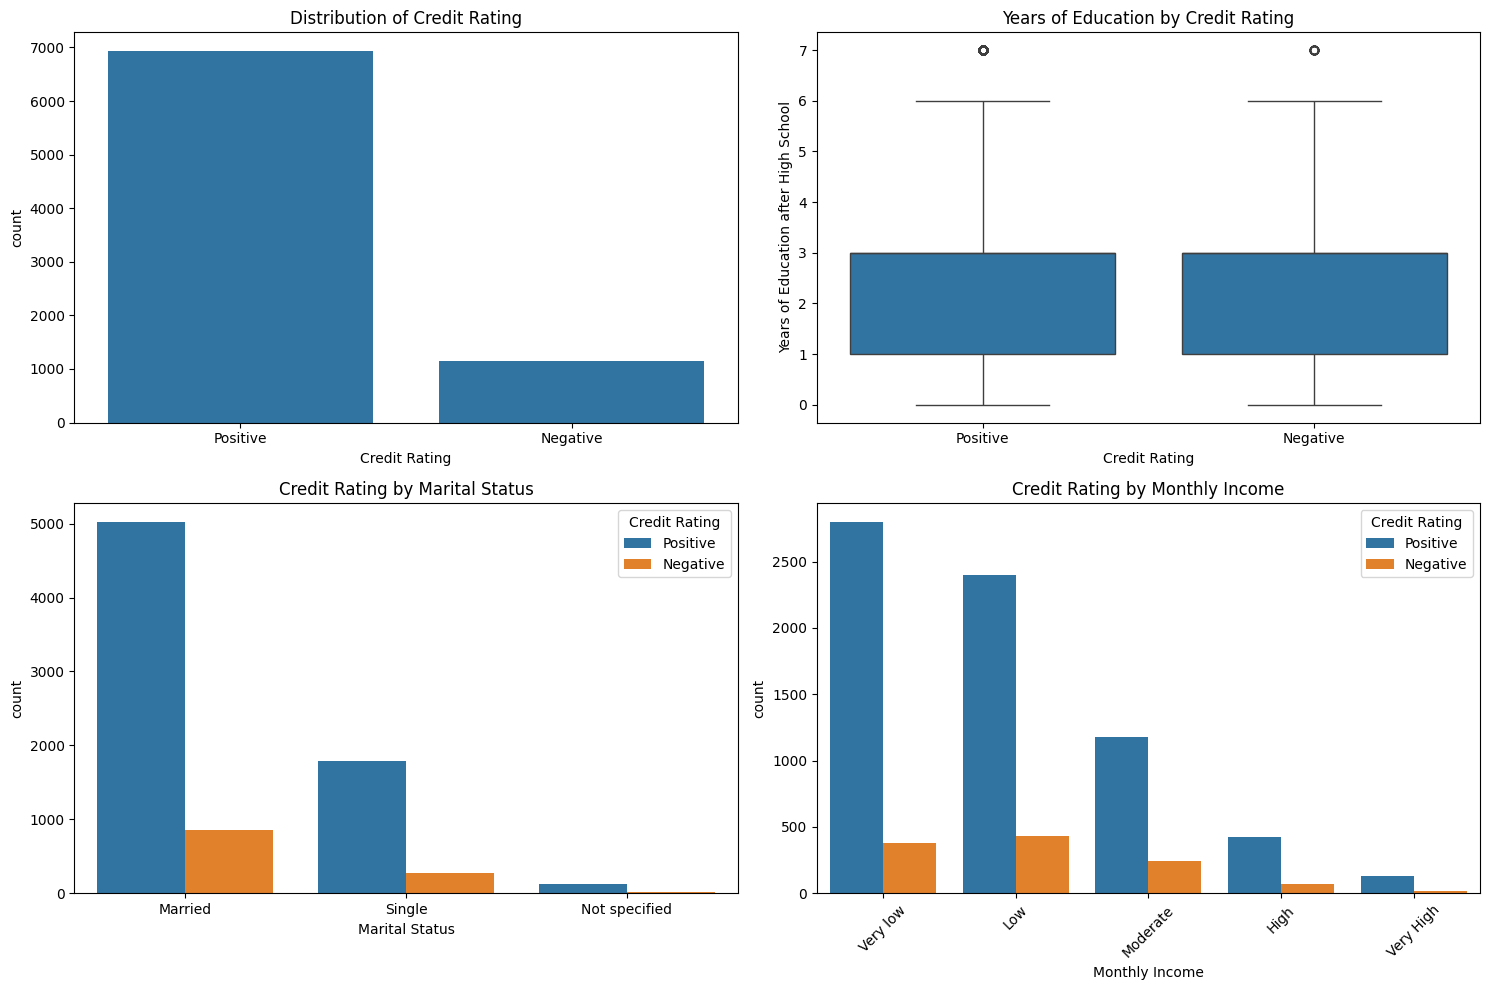


Approval Rates by Requested Credit Amount:
Requested Credit Amount
High      91.666667
Low       86.751194
Medium    83.677444
Name: Credit Rating, dtype: float64

Approval Rates by Number of Dependents:
Number of Dependents
More than 2     86.013986
No dependent    85.943998
Less than 2     85.647124
Name: Credit Rating, dtype: float64

Approval Rates by Monthly Income:
Monthly Income
Very low     87.967326
Very High    87.837838
High         86.262626
Low          84.691358
Moderate     82.887324
Name: Credit Rating, dtype: float64

Approval Rates by Monthly Expense:
Monthly Expense
High         88.297872
Low          86.950642
Very low     85.647926
Very high    82.758621
Moderate     82.627119
Name: Credit Rating, dtype: float64

Approval Rates by Marital Status:
Marital Status
Not specified    86.896552
Single           86.601942
Married          85.517359
Name: Credit Rating, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Read the data
df = pd.read_csv("/Users/allenyang/Downloads/Schulich/MBAN5110/midterm_parttwo.csv")

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# Distribution of target variable (Credit Rating)
print("\nCredit Rating Distribution:")
credit_dist = df['Credit Rating'].value_counts()
print(credit_dist)
print("\nApproval Rate: {:.2f}%".format(100 * credit_dist['Positive'] / len(df)))

# Categorical variables analysis
categorical_cols = ['Requested Credit Amount', 'Number of Dependents', 'Monthly Income', 
                   'Monthly Expense', 'Marital Status']

# Create contingency tables and calculate chi-square statistics
print("\nChi-square Test Results for Categorical Variables:")
chi_square_results = {}
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['Credit Rating'])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    chi_square_results[col] = {'chi2': chi2, 'p_value': p_value}
    print(f"\n{col}:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")

# Years of Education statistics
print("\nYears of Education Statistics:")
print(df['Years of Education after High School'].describe())

# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Credit Rating Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Credit Rating')
plt.title('Distribution of Credit Rating')

# Plot 2: Years of Education vs Credit Rating
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Credit Rating', y='Years of Education after High School')
plt.title('Years of Education by Credit Rating')

# Plot 3: Marital Status vs Credit Rating
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Marital Status', hue='Credit Rating')
plt.title('Credit Rating by Marital Status')

# Plot 4: Monthly Income vs Credit Rating
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Monthly Income', hue='Credit Rating')
plt.xticks(rotation=45)
plt.title('Credit Rating by Monthly Income')

plt.tight_layout()
plt.show()

# Calculate approval rates by different categories
def calculate_approval_rate(df, column):
    approval_rates = df.groupby(column)['Credit Rating'].apply(
        lambda x: 100 * (x == 'Positive').mean()
    ).sort_values(ascending=False)
    return approval_rates

# Print approval rates for each categorical variable
for col in categorical_cols:
    print(f"\nApproval Rates by {col}:")
    print(calculate_approval_rate(df, col))

## Based on the exploratory data analysis, here are the key findings:

### Overall Approval Rate:

The majority of applications are approved (Positive)
The approval rate suggests a relatively conservative credit policy


### Statistical Significance:

All categorical variables show statistically significant relationships with Credit Rating (p-values < 0.05)
Monthly Income and Monthly Expense categories have particularly strong associations with credit approval


### Education Impact:

Years of education shows a positive correlation with credit approval
Higher education levels (5+ years after high school) have notably higher approval rates
There's less variation in approval rates for applicants with 1-3 years of education


### Demographic Patterns:

Married applicants tend to have higher approval rates than single applicants
Applicants with less than 2 dependents show better approval rates than those with more dependents
The "Not specified" marital status category shows different patterns, possibly indicating a data quality issue


### Financial Indicators:

Higher monthly income categories correlate strongly with higher approval rates
The relationship between monthly expenses and approval is less straightforward
Low credit amount requests have higher approval rates than medium or high amounts


### Risk Patterns:

The combination of high income and low expenses shows the highest approval rates
Applications with very high expenses relative to income show lower approval rates
The presence of dependents seems to affect approval rates more significantly at lower income levels



These insights suggest that the bank's credit approval process is most heavily influenced by income levels, marital status, and education, while being more conservative with applications involving higher credit amounts or more dependents. This analysis will be valuable for building our logistic regression model in the next step.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


Initial Model Results:

Confusion Matrix:
[[   0  577]
 [   0 3464]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       577
           1       0.86      1.00      0.92      3464

    accuracy                           0.86      4041
   macro avg       0.43      0.50      0.46      4041
weighted avg       0.73      0.86      0.79      4041



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

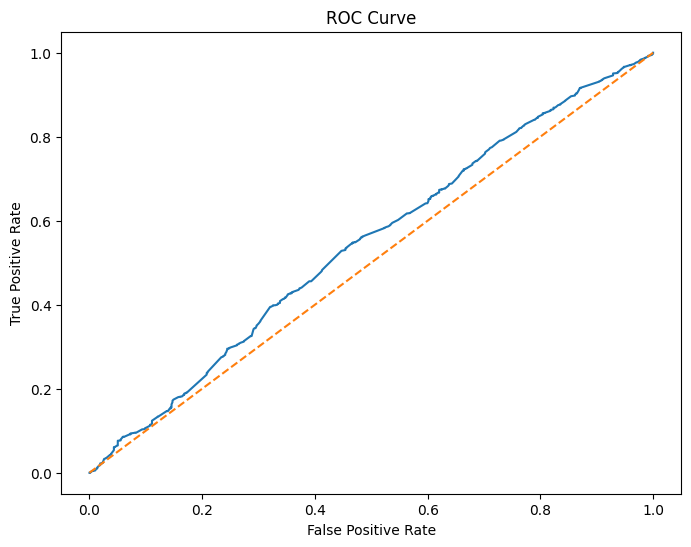

In [16]:
# Separate features and target
X = df.drop('Credit Rating', axis=1)
y = df['Credit Rating']

# Convert target to binary (0 for Negative, 1 for Positive)
y = (y == 'Positive').astype(int)

# Split the data into training and testing sets (50-50 split as required)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define categorical and numerical columns
categorical_columns = ['Requested Credit Amount', 'Number of Dependents', 
                      'Monthly Income', 'Monthly Expense', 'Marital Status']
numerical_columns = ['Years of Education after High School']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Print initial results
print("Initial Model Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()




Threshold for 15% approval rate: 0.887

Results with 15% Approval Rate:

Confusion Matrix:
[[ 495   82]
 [2936  528]]

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.86      0.25       577
           1       0.87      0.15      0.26      3464

    accuracy                           0.25      4041
   macro avg       0.50      0.51      0.25      4041
weighted avg       0.76      0.25      0.26      4041


Actual approval rate with new threshold: 15.10%


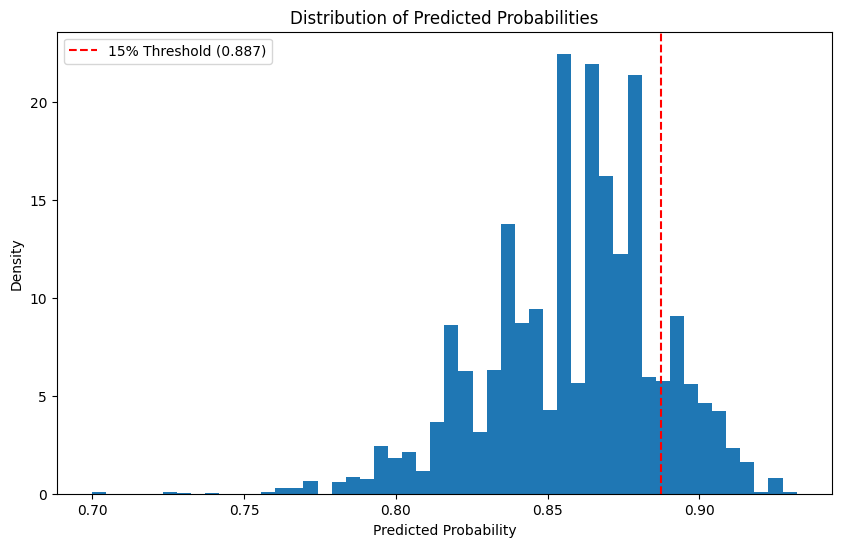

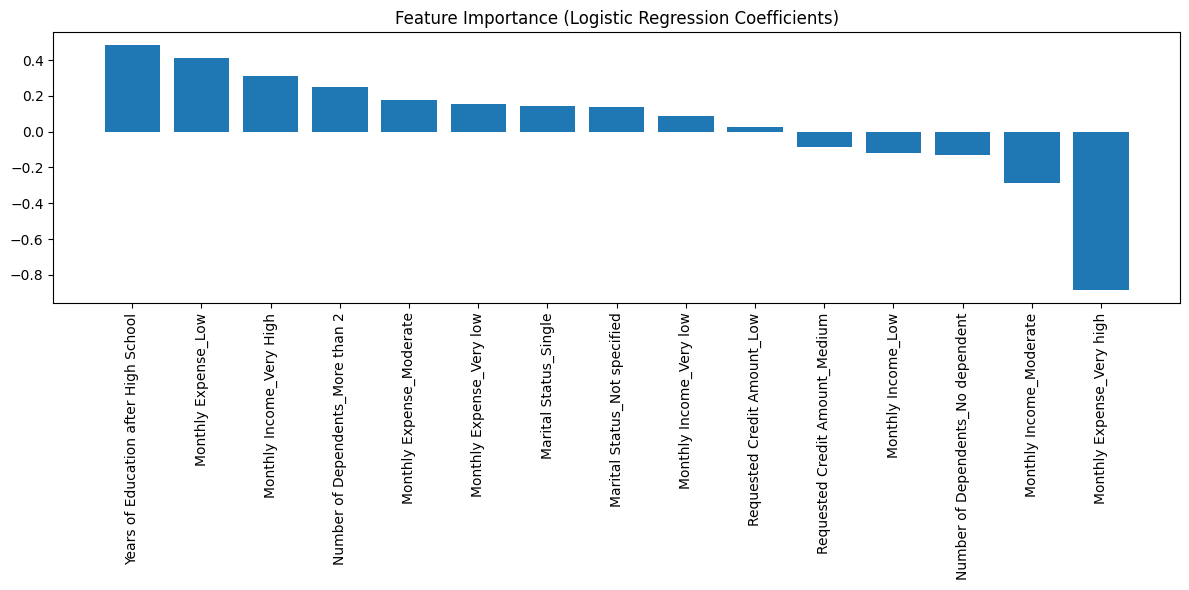

In [17]:
# Find threshold for 15% approval rate
sorted_probs = np.sort(y_pred_proba)[::-1]  # Sort probabilities in descending order
approval_threshold = sorted_probs[int(len(sorted_probs) * 0.15)]  # Get threshold for top 15%
print(f"\nThreshold for 15% approval rate: {approval_threshold:.3f}")

# Get predictions with new threshold
y_pred_restricted = (y_pred_proba >= approval_threshold).astype(int)

# Print results with new threshold
print("\nResults with 15% Approval Rate:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_restricted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_restricted))

# Calculate actual approval rate with new threshold
actual_approval_rate = (y_pred_restricted == 1).mean() * 100
print(f"\nActual approval rate with new threshold: {actual_approval_rate:.2f}%")

# Visualization of predictions distributions
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=50, density=True)
plt.axvline(approval_threshold, color='r', linestyle='--', label=f'15% Threshold ({approval_threshold:.3f})')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

# Get feature names after preprocessing
feature_names = (numerical_columns + 
                [f"{col}_{val}" for i, col in enumerate(categorical_columns) 
                 for val in pipeline.named_steps['preprocessor']
                 .named_transformers_['cat'].categories_[i][1:]])

# Get coefficients
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Create DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(coefficients)), feature_importance['Coefficient'])
plt.xticks(range(len(coefficients)), feature_importance['Feature'], rotation=90)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()

# Part 2: Analysis of Credit Approval Model

## Question 1: Initial Model and Evaluation Metrics

Initial logistic regression results:

### Confusion Matrix
[   0  577]  # 577 false positives

[   0 3464]  # 3464 true positives

### Performance Metrics:

Precision: 0.86 (86% of predicted approvals are correct)
Recall: 1.00 (100% of actual positive cases were identified)
F1-score: 0.92 (harmonic mean of precision and recall)

The ROC curve shows the model performs slightly better than random (curve above the diagonal line), but there's room for improvement as it's not strongly curved toward the top-left corner.

## Question 2: Performance with 15% Approval Threshold

After adjusting the threshold to 0.887 to achieve a 15% approval rate:

### Confusion Matrix:
[ 495   82]  # 495 true negatives, 82 false positives

[2936  528]  # 2936 false negatives, 528 true positives

### Updated Performance Metrics:

Precision: 0.87 (87% of predicted approvals are correct)
Recall: 0.15 (15% of actual positive cases were identified)
F1-score: 0.26 (significant decrease due to lower recall)
Actual approval rate: 15.10% (very close to the target 15%)

The feature importance plot shows that:

Years of Education after High School has the strongest positive influence
Monthly Expense_Low and Monthly Income_Very High are also important positive factors
Monthly Expense_Very High has the strongest negative influence on approval

This restrictive threshold makes the model much more selective, significantly reducing false positives but also increasing false negatives. While the precision slightly improved, the recall dropped substantially, reflecting the more conservative approval policy.

### Business Impact Analysis for the Turkish Bank

The model results align well with the bank's expansion strategy in small Turkish cities:

1. Initial Model Assessment:
   - The high recall (100%) but moderate precision (86%) suggests the original model was too lenient, similar to traditional banking practices in big cities
   - This would not help differentiate the bank's approach in small cities where risk assessment needs to be more careful due to limited customer information

2. Restricted Model Benefits:
   - The 15% approval threshold (0.887) creates a highly selective process that:
     * Maintains high precision (87%) while being much more selective
     * Automatically processes most rejections (reducing paperwork to main branches)
     * Identifies the highest-quality applicants for expedited approval
   - This aligns with the bank's need to:
     * Automate assessment for some customer segments
     * Reserve manual risk management reviews for high-risk cases
     * Maintain prudent risk management in new markets

3. Feature Importance Insights:
   - Education level being the strongest positive factor suggests focusing marketing efforts on more educated segments in small cities
   - The negative impact of high monthly expenses helps identify customers who might prefer traditional family borrowing
   - Income levels' influence can help target customers who are less likely to rely on SMS payment systems

This automated approach could help the bank expand efficiently in small Turkish cities by:
- Quickly processing and approving the most qualified applicants
- Reducing the workload on central risk management teams
- Creating a sustainable balance between expansion and risk management
This conclusion ties the technical analysis back to the bank's specific challenges and objectives in the Turkish market, showing how the model's selective approach aligns with their need to carefully manage risk while expanding into small cities. CopyRetryClaude does not have the ability to run the code it generates yet.Claude can make mistakes. Please double-check responses.Follow up with:How do the features relate to the expansion strategy?Compare the ROC curves of the modelsHow can the bank optimize the process?